In [3]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

from torch.optim import Adam
from copy import deepcopy
from torch.autograd import Variable
import os

from utils import *
from train import *
from models import *


####
dataset_number = 10

number_of_samples_per_day = 48
number_of_samples_per_week = 48 * 7
week_length = number_of_samples_per_day * 7
weekend_period_length = number_of_samples_per_day * 2

weekend_gain = 1.2
weekend_gain_list = [1]*(number_of_samples_per_week -
                         weekend_period_length)+[weekend_gain]*weekend_period_length
week_simulation = (1+np.sin(np.linspace(-np.pi/2, 14*np.pi -
                   np.pi/2, week_length)))*weekend_gain_list

number_of_weeks = 1



nbr_of_days = 7 * number_of_weeks
timeseries_simulation = np.tile(week_simulation, number_of_weeks)

trend = [np.linspace(0, i, num=number_of_samples_per_day*nbr_of_days)
         for i in np.linspace(0, 2, dataset_number)]
noise = [np.random.normal(scale=scale, size=number_of_samples_per_day*nbr_of_days)
         for scale in np.linspace(0.01, 0.1, dataset_number)]
merged_data = timeseries_simulation + trend + noise
#####

train_window = 36
horizon = 12

input_dimension = 1
hidden_dimension = 40
batch_size = 256

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = 'cpu'
#####


train_loader, validation_loader = create_loaders(
    merged_data[0], train_window, horizon, batch_size)
model_0 = LSTM_Model(input_dimension, hidden_dimension, horizon)
train_object_0 = Train(model_0, train_loader, validation_loader)
train_object_0.train(num_epochs=5, verbose=True, verbose_every=1)

distances_list_0 = []
for i in range(0, len(merged_data)):
    print(f'computing distance {i}')
    t_loader, v_loader = create_loaders(merged_data[i], train_window, horizon, batch_size)
    distances_list_0.append(compute_distance(train_object_0.model, validation_loader, v_loader, batch_size, batch_size))

#######

train_loader, validation_loader = create_loaders(
    merged_data[5], train_window, horizon, batch_size)
model_5 = LSTM_Model(input_dimension, hidden_dimension, horizon)
train_object_5 = Train(model_5, train_loader, validation_loader)
train_object_5.train(num_epochs=5, verbose=True, verbose_every=1)

distances_list_5 = []
for i in range(0, len(merged_data)):
    print(f'computing distance {i}')
    t_loader, v_loader = create_loaders(merged_data[i], train_window, horizon, batch_size)
    distances_list_5.append(compute_distance(train_object_5.model, train_loader, t_loader, batch_size, batch_size))

-----starting training-----
epoch 01 train loss 1.63356 ------ validation loss 1.70039
epoch 02 train loss 1.50734 ------ validation loss 1.39342
epoch 03 train loss 1.36751 ------ validation loss 1.22224
epoch 04 train loss 1.16824 ------ validation loss 0.73532
epoch 05 train loss 0.91388 ------ validation loss 0.90484
computing distance 0
computing distance 1
computing distance 2
computing distance 3
computing distance 4
computing distance 5
computing distance 6
computing distance 7
computing distance 8
computing distance 9
-----starting training-----
epoch 01 train loss 4.57681 ------ validation loss 4.51369
epoch 02 train loss 4.23510 ------ validation loss 4.26776
epoch 03 train loss 3.85036 ------ validation loss 3.23066
epoch 04 train loss 3.27393 ------ validation loss 2.73616
epoch 05 train loss 2.41347 ------ validation loss 1.20177
computing distance 0
computing distance 1
computing distance 2
computing distance 3
computing distance 4
computing distance 5
computing distance

In [5]:
train_loader, validation_loader = create_loaders(
    merged_data[5], train_window, horizon, batch_size)
model_5 = LSTM_Model(input_dimension, hidden_dimension, horizon)
train_object_5 = Train(model_5, train_loader, validation_loader)
train_object_5.train(num_epochs=5, verbose=True, verbose_every=1)

distances_list_5 = []
for i in range(0, len(merged_data)):
    print(f'computing distance {i}')
    t_loader, v_loader = create_loaders(merged_data[i], train_window, horizon, batch_size)
    distances_list_5.append(compute_distance(train_object_5.model, train_loader, t_loader, batch_size, batch_size))

-----starting training-----
epoch 01 train loss 3.14851 ------ validation loss 3.35943
epoch 02 train loss 2.93245 ------ validation loss 3.11729
epoch 03 train loss 2.72833 ------ validation loss 2.03701
epoch 04 train loss 2.43085 ------ validation loss 1.96060
epoch 05 train loss 1.94686 ------ validation loss 1.29994
computing distance 0
computing distance 1
computing distance 2
computing distance 3
computing distance 4
computing distance 5
computing distance 6
computing distance 7
computing distance 8
computing distance 9


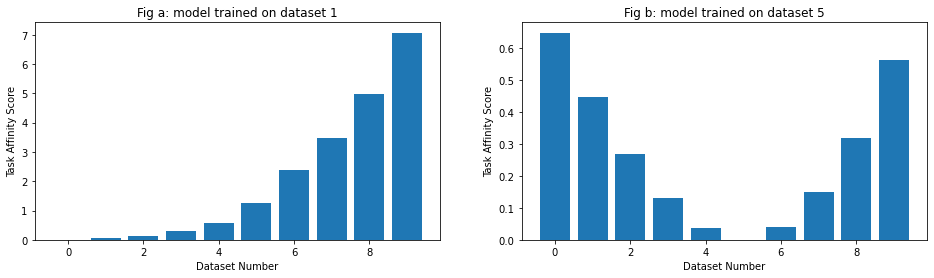

In [6]:
fig, axes = plt.subplots(1, 2,  figsize=(16, 4))

axes[0].bar(range(dataset_number), distances_list_0)
axes[0].set_xlabel('Dataset Number')
axes[0].set_ylabel('Task Affinity Score')
axes[0].set_title('Fig a: model trained on dataset 1')

axes[1].bar(range(dataset_number), distances_list_5)
axes[1].set_xlabel('Dataset Number')
axes[1].set_ylabel('Task Affinity Score')
axes[1].set_title('Fig b: model trained on dataset 5')

plt.savefig('figure.png')
plt.show()